<a href="https://colab.research.google.com/github/dushyantnagar7806/Transfer-Learning-Deep-Learning/blob/main/Transfer_Learning_in_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # **Transfer learning in image classification**

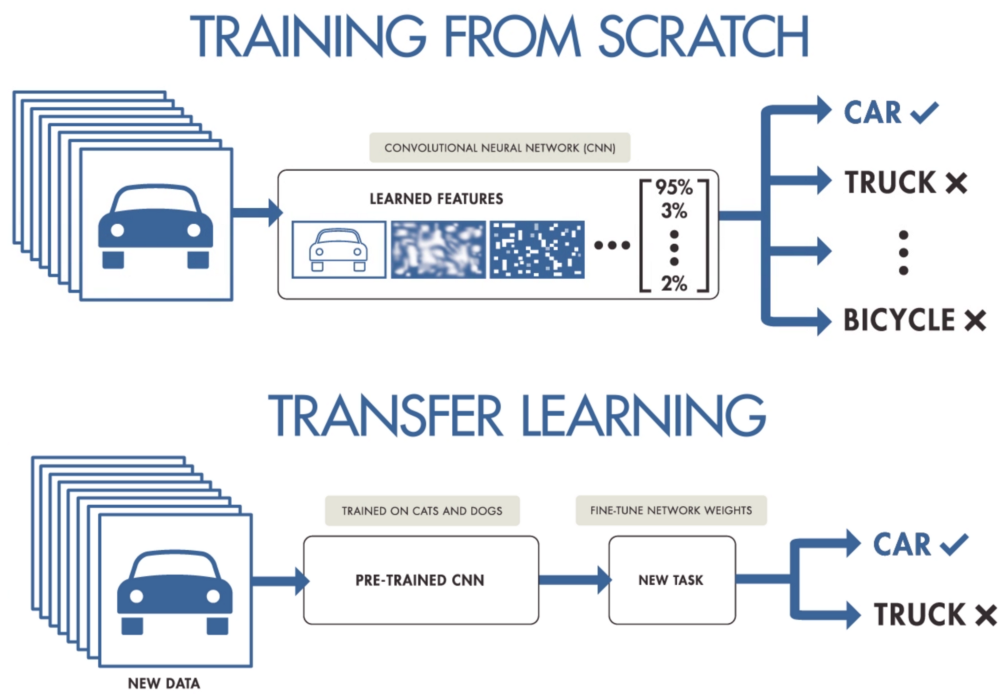


**Good thing is, you don’t really need to start building your neural network from scratch. You now can leverage from the power of past powerful deep learning models and transfer their knowledge to your own specific domain — thanks to transfer learning.**

- In this notebook we will use transfer learning and take pre-trained model from google's Tensorflow Hub and re-train that on flowers dataset. Using pre-trained model saves lot of time and computational budget for new classification problem at hand

In [1]:
!pip install tensorflow_hub

In [2]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# import warnings
import warnings as w
w.filterwarnings('ignore')

## Make predictions using ready made model (without any training

In [3]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

Read all the Information Pretrain model
[link text](https://tfhub.dev/google/collections/mobilenet-edgetpu-v2/1)

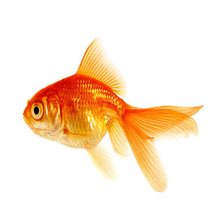

In [4]:
# resize the image
gold_fish = Image.open("/content/drive/MyDrive/Transfer Learning Deep Learning/goldfish.jpg.jpg").resize(IMAGE_SHAPE)
gold_fish

In [5]:
# rescal the image
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [6]:
# add one axis
gold_fish[np.newaxis, ...]

array([[[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        ...,

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]]])

In [7]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

1/1 [==============================] - 8s 8s/step


(1, 1001)

In [8]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [9]:
# tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
image_labels = []
with open("/content/drive/MyDrive/Transfer Learning Deep Learning/ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [10]:
image_labels[predicted_label_index]

'goldfish'

# Load flowers dataset

In [11]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228813984/228813984 [==============================] - 1s 0us/step


In [12]:
data_dir

'./datasets/flower_photos'

In [13]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [14]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/sunflowers/5139977579_ea2dd6a322_m.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/193874852_fb633d8d00_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/6627521877_6e43fb3c49_m.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/12471290635_1f9e3aae16_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/18828277053_1493158b28.jpg')]

In [15]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [16]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/4764674741_82b8f93359_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5578766623_542c91dfaa_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8987479080_32ab912d10_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15697872479_ed48e9dd73_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4256169180_55df2048a0.jpg')]

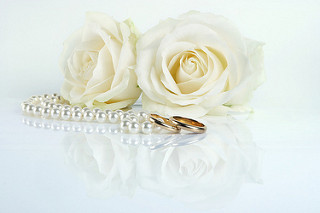

In [17]:
Image.open(str(roses[1]))

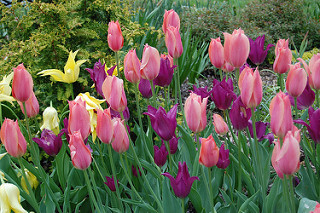

In [18]:
tulips = list(data_dir.glob('tulips/*'))
Image.open(str(tulips[0]))

## Read flowers images from disk into numpy array using opencv

In [19]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}


In [20]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [21]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/4764674741_82b8f93359_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5578766623_542c91dfaa_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8987479080_32ab912d10_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15697872479_ed48e9dd73_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4256169180_55df2048a0.jpg')]

In [22]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/4764674741_82b8f93359_n.jpg'

In [23]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [24]:
img.shape

(240, 320, 3)

In [25]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [26]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [27]:
X = np.array(X)
y = np.array(y)

# Train test split

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [29]:
# Preprocessing: scale images
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255


In [30]:
X[0].shape

(224, 224, 3)

In [31]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [32]:
x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X[2], IMAGE_SHAPE)

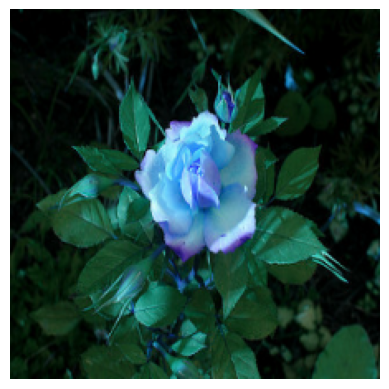

In [33]:
x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X[2], IMAGE_SHAPE)
plt.axis('off')
plt.imshow(X[0])

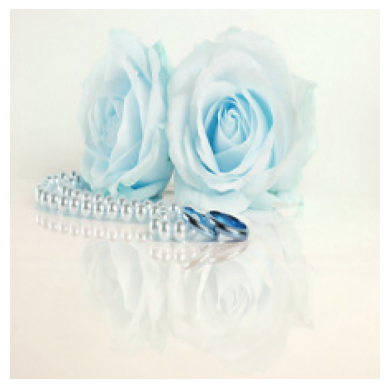

In [34]:
plt.axis('off')
plt.imshow(X[1])

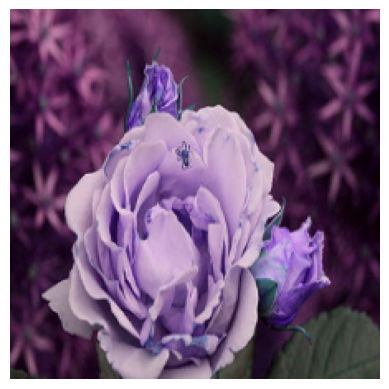

In [35]:
plt.axis('off')
plt.imshow(X[2])

In [36]:
predicted = classifier.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted = np.argmax(predicted, axis=1)
predicted

1/1 [==============================] - 1s 967ms/step


array([795, 795, 795])

In [37]:
image_labels[795]

'shower curtain'

# Now take pre-trained model and retrain it using flowers images

In [38]:

feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)


# trainable=False 'means the Cnn layers are not change and fully connected layers are changes '

In [39]:
# only Dense layer are train

num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [40]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 10s 40ms/step - loss: 0.8186 - acc: 0.6879
Epoch 2/5
86/86 [==============================] - 3s 40ms/step - loss: 0.4234 - acc: 0.8565
Epoch 3/5
86/86 [==============================] - 3s 40ms/step - loss: 0.3310 - acc: 0.8932
Epoch 4/5
86/86 [==============================] - 4s 43ms/step - loss: 0.2776 - acc: 0.9142
Epoch 5/5
86/86 [==============================] - 3s 40ms/step - loss: 0.2401 - acc: 0.9346


In [41]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 2s 59ms/step - loss: 0.3751 - acc: 0.8660


[0.37512749433517456, 0.8660130500793457]